In [43]:
import json
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage.io as io
import os

In [44]:
exp = "adamW_multi-scale_fold1"

In [45]:
test = f'/opt/ml/yolov7/runs/test/{exp}/best_predictions.json'  # test.py로 생성된 json 파일

with open(test) as f: 
    data = json.load(f)

In [46]:
image_id = [f'test/{i:04}.jpg' for i in range(4871)]
img_id = 0
prediction = ['']  * 4871 

In [47]:
for d in data:
    # (xmin, ymin, w, h)
    xmin, ymin, w, h = d["bbox"]
    xmax, ymax = xmin+w, ymin+h
    if xmax >1024 or ymax>1024:
        print("error")
        break
    prediction[d["image_id"]] += f'{d["category_id"]-1} {d["score"]} {xmin} {ymin} {xmax} {ymax} '

In [48]:
prediction_data = {
    'PredictionString' : prediction,
    'image_id' : image_id
}

dataframe = pd.DataFrame(prediction_data)

In [49]:
classes = [ "General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing" ]

test/0049.jpg


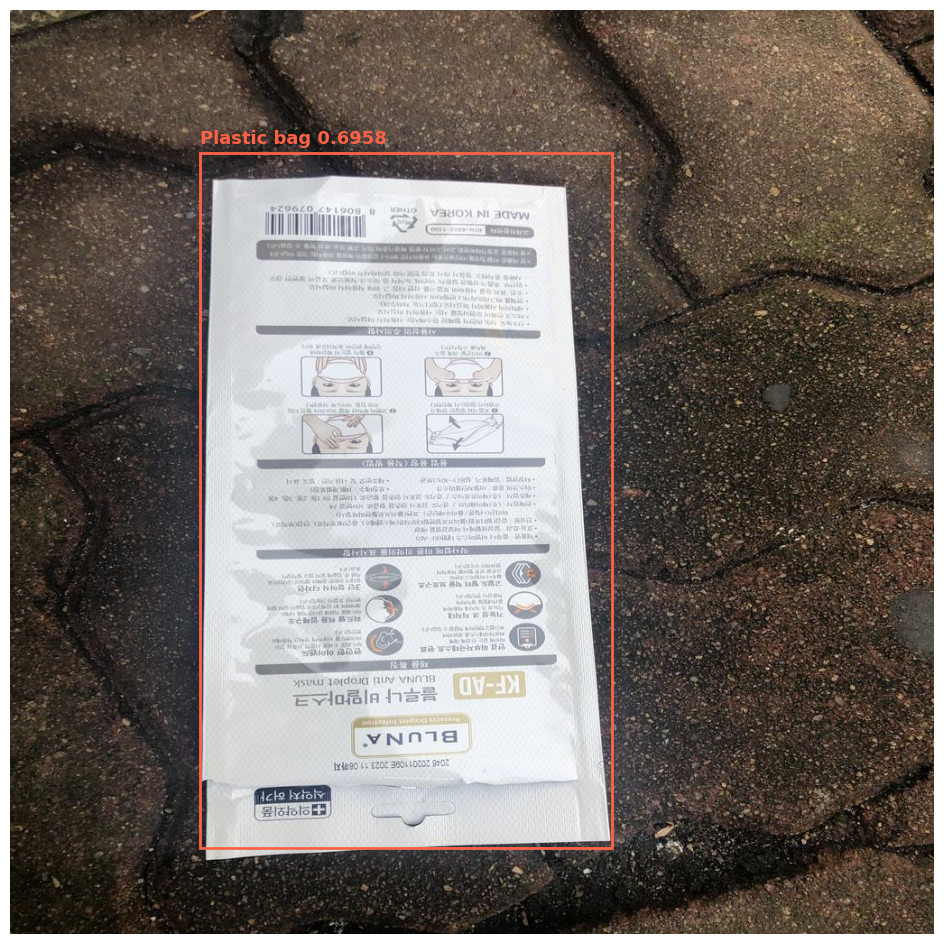

In [50]:
index = 49 #random.randrange(4871)

file_name = image_id[index]

print(file_name)
I = io.imread(os.path.join('/opt/ml/dataset', file_name))
plt.rcParams["figure.figsize"] = (12,12)
plt.axis('off')
plt.imshow(I)
ax = plt.gca()
for annotation in data:
    if index == annotation['image_id']:
        if annotation["score"] > 0.1:
            box = annotation['bbox']
            bb = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth = 2, edgecolor = 'tomato',facecolor = 'none')
            ax.add_patch(bb)
            ax.text(box[0], box[1] - 10 , classes[int(annotation['category_id'])-1]+" "+str(annotation["score"]), weight = 'bold', color = 'tomato', fontsize = 13)
plt.show()

In [51]:
# output/yolov5/exp_name에 저장됩니다.
dataframe.to_csv(f'./{exp}_submission.csv', sep=',', na_rep='NaN', index=None)